## Comparing ORiGAMi against baseline classifiers


In [2]:
import pandas as pd

from origami.utils.guild import get_runs_by_ids

run_ids = {
    "df7d8872": "ORiGAMi",  # label dungeons-10-repr-best
    "76ba6a47": "Log. Regression",  # label dungeons-13-lr-hyperopt
    "6915e139": "Random Forest",  # label dungeons-12-rf-hyperopt
    "ecb819bf": "XGBoost",  # label dungeons-1-xgb-hyperopt
    "22c44646": "LightGBM",  # label dungeons-11-lgb-hyperopt
}

runs = get_runs_by_ids(run_ids.keys())
display(runs)
scalars = runs.scalars()
display(scalars)

# pivot and get relevant stats
stats_df = scalars.pivot(index="run", columns="tag", values="first_val")

# reset index to short IDs
stats_df.set_index(pd.Index([str(r)[:8] for r in stats_df.index]), inplace=True)

# drop unused columns and rename tag to run
stats_df = stats_df[["train_acc_mean", "train_acc_std", "test_acc_mean", "test_acc_std"]]
stats_df.index.name = "run"

# add classifier column back into DataFrame
stats_df["classifier"] = [run_ids[r] for r in stats_df.index]

# change row order to 3 1 0 4 2 and sort by index
# stats_df = stats_df.reindex([3, 1, 0, 4, 2])
# stats_df.sort_index(inplace=True)

stats_df = stats_df.iloc[[2, 1, 4, 0, 3]]
stats_df

,run,operation,started,status,label
20,6915e139,rf:hyperopt,2024-10-28 21:19:45,completed,dungeons-12-rf-hyperopt
242,76ba6a47,logreg:hyperopt,2024-10-28 20:19:20,completed,dungeons-13-lr-hyperopt
277,22c44646,lightgbm:hyperopt,2024-10-28 20:07:25,completed,dungeons-11-lgb-hyperopt
324,df7d8872,origami:all,2024-10-27 07:58:38,completed,dungeons-10-repr-best
664,ecb819bf,xgboost:hyperopt,2024-10-25 08:41:12,completed,dungeons-1-xgb-hpo


/Users/thomas/code/origami/.venv/lib/python3.11/site-packages/guild/ipy.py:207: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [row[1][0].value for row in self.iterrows()]


,run,prefix,tag,first_val,first_step,last_val,last_step,min_val,min_step,max_val,max_step,avg_val,count,total
0,6915e13969bb475b99264580e2507344,.guild,fold,0.0000,0,4.0000,0,0.0000,0,4.0000,0,2.00000,5,10.0000
1,6915e13969bb475b99264580e2507344,.guild,test_acc,0.3680,0,0.3645,0,0.3515,0,0.3835,0,0.36730,5,1.8365
2,6915e13969bb475b99264580e2507344,.guild,test_acc_max,0.3835,0,0.3835,0,0.3835,0,0.3835,0,0.38350,1,0.3835
3,6915e13969bb475b99264580e2507344,.guild,test_acc_mean,0.3673,0,0.3673,0,0.3673,0,0.3673,0,0.36730,1,0.3673
4,6915e13969bb475b99264580e2507344,.guild,test_acc_min,0.3515,0,0.3515,0,0.3515,0,0.3515,0,0.35150,1,0.3515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,ecb819bf25b8428b9d2103080367129c,.guild,train_acc,0.9939,0,0.9970,0,0.9932,0,0.9970,0,0.99474,5,4.9737
57,ecb819bf25b8428b9d2103080367129c,.guild,train_acc_max,0.9970,0,0.9970,0,0.9970,0,0.9970,0,0.99700,1,0.9970
58,ecb819bf25b8428b9d2103080367129c,.guild,train_acc_mean,0.9948,0,0.9948,0,0.9948,0,0.9948,0,0.99480,1,0.9948
59,ecb819bf25b8428b9d2103080367129c,.guild,train_acc_min,0.9932,0,0.9932,0,0.9932,0,0.9932,0,0.99320,1,0.9932


tag,train_acc_mean,train_acc_std,test_acc_mean,test_acc_std,classifier
run,,,,,
76ba6a47,0.3579,0.0042,0.3174,0.0079,Log. Regression
6915e139,1.0000,0.0000,0.3673,0.0102,Random Forest
ecb819bf,0.9948,0.0013,0.4058,0.0106,XGBoost
22c44646,0.7600,0.0055,0.4134,0.0101,LightGBM
df7d8872,1.0000,0.0000,0.9998,0.0002,ORiGAMi


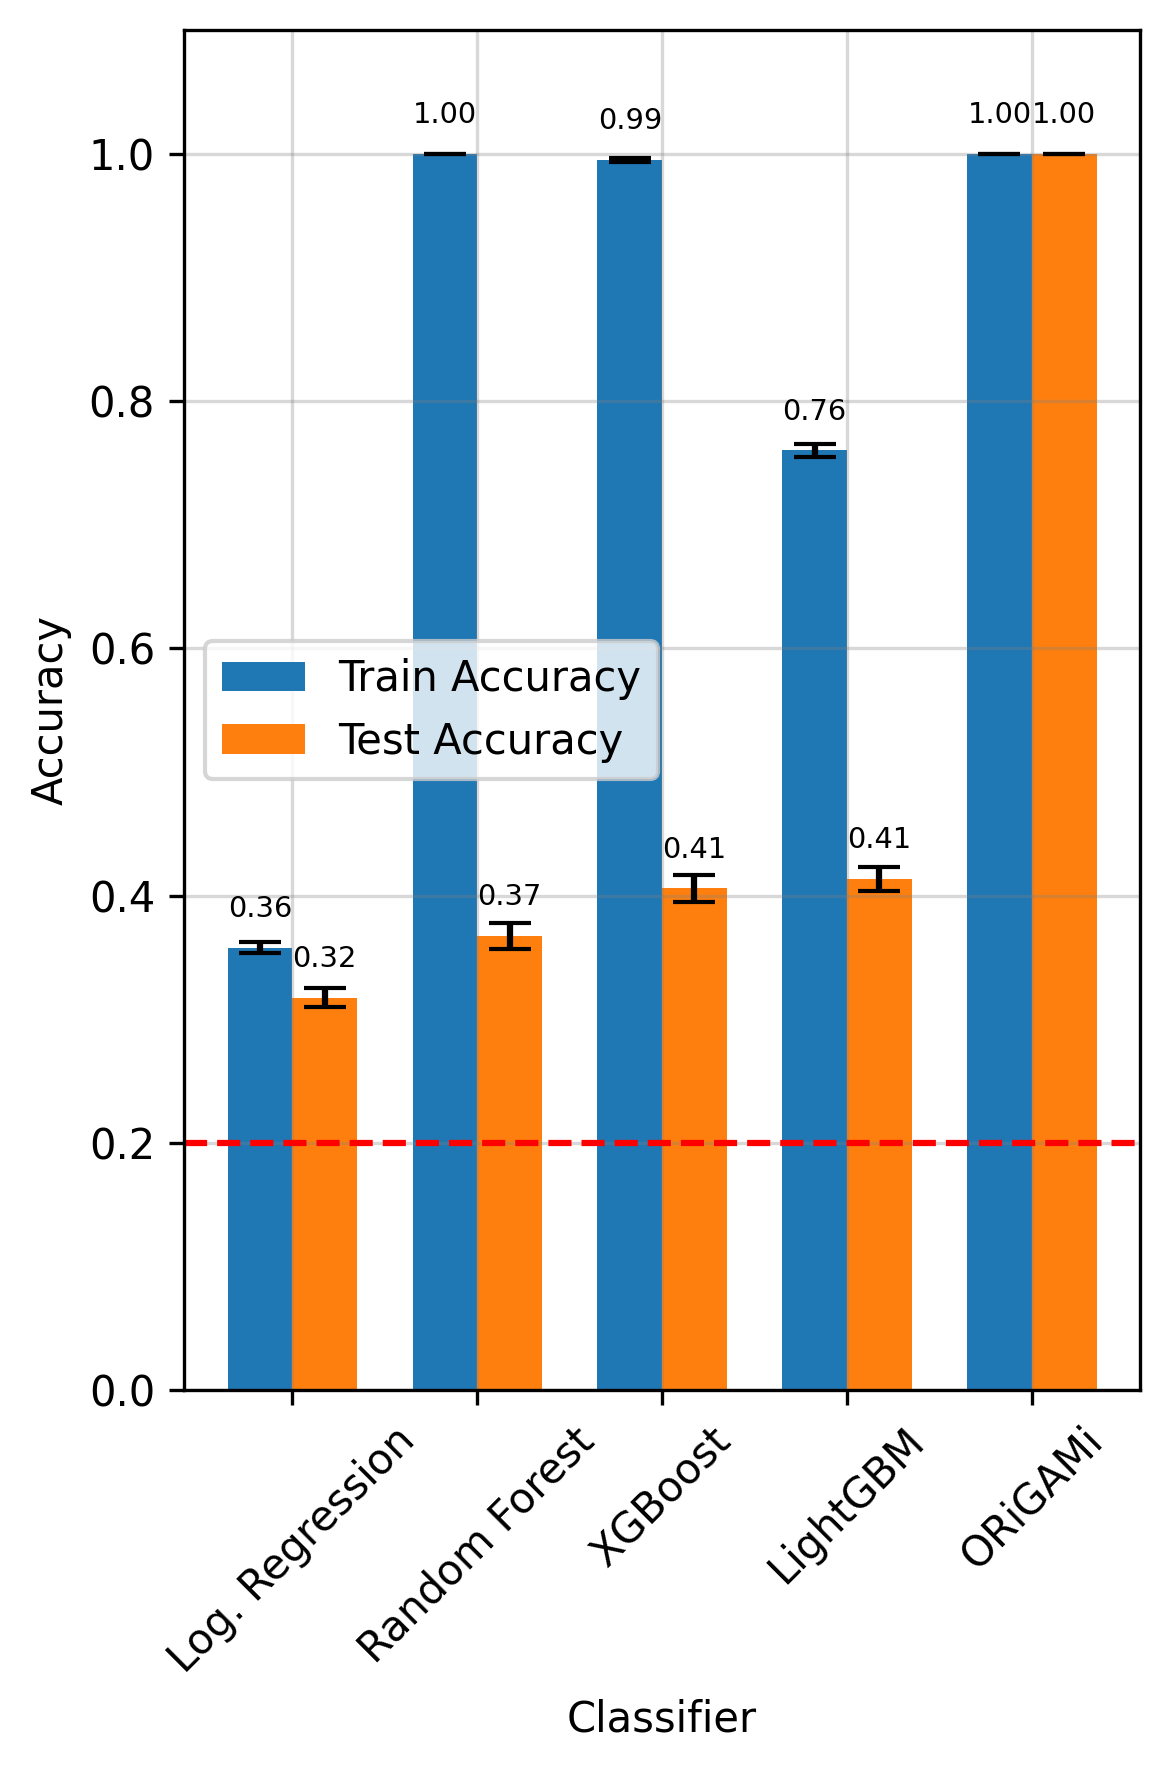

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with white background
plt.figure(figsize=(4, 6), dpi=300, facecolor="white")
ax = plt.gca()
ax.set_facecolor("white")

# Extract data
classifiers = stats_df["classifier"].values
x = np.arange(len(classifiers))
width = 0.35  # Width of the bars

# Create bars
plt.bar(
    x - width / 2,
    stats_df["train_acc_mean"],
    width,
    label="Train Accuracy",
    yerr=stats_df["train_acc_std"],
    capsize=5,
)
plt.bar(
    x + width / 2,
    stats_df["test_acc_mean"],
    width,
    label="Test Accuracy",
    yerr=stats_df["test_acc_std"],
    capsize=5,
)

# Customize plot
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
# plt.title("Train vs Test Accuracy by Classifier (5-fold CV)")
plt.xticks(x, classifiers, rotation=45)
plt.legend(loc="center left")
plt.grid(True, alpha=0.3, color="gray")

# Add value labels on top of bars
for i in x:
    plt.text(
        i - width / 2,
        stats_df["train_acc_mean"].iloc[i] + 0.02,
        f"{stats_df['train_acc_mean'].iloc[i]:.2f}",
        ha="center",
        va="bottom",
        fontsize="x-small",
    )
    plt.text(
        i + width / 2,
        stats_df["test_acc_mean"].iloc[i] + 0.02,
        f"{stats_df['test_acc_mean'].iloc[i]:.2f}",
        ha="center",
        va="bottom",
        fontsize="x-small",
    )

# Adjust layout to prevent label cutoff
plt.tight_layout()

# draw a red dashed line at y=0.2
ax.axhline(y=0.2, color="red", linestyle="dashed")
ax.set_ylim(0.0, 1.1)

# Show plot
plt.show()


## Comparing different position encodings

- `KEY_VALUE`
- `INTEGER`
- `SINE_CONSINE`
- `NONE`


,run,operation,started,status,label
0,cf2f4b02,origami:train,2024-10-27 09:49:28,completed,train-for-run-df7d8872-fold-4
1,b70c556d,origami:train,2024-10-27 09:21:49,completed,train-for-run-df7d8872-fold-3
2,c5b72193,origami:train,2024-10-27 08:53:47,completed,train-for-run-df7d8872-fold-2
3,0277906c,origami:train,2024-10-27 08:25:59,completed,train-for-run-df7d8872-fold-1
4,2cf63925,origami:train,2024-10-27 07:58:50,completed,train-for-run-df7d8872-fold-0


/Users/thomas/code/origami/.venv/lib/python3.11/site-packages/guild/ipy.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return _runs_scalars_detail([self[0].value])
/Users/thomas/code/origami/.venv/lib/python3.11/site-packages/guild/ipy.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return _runs_scalars_detail([self[0].value])
/Users/thomas/code/origami/.venv/lib/python3.11/site-packages/guild/ipy.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by 

(0.0, 1.19)

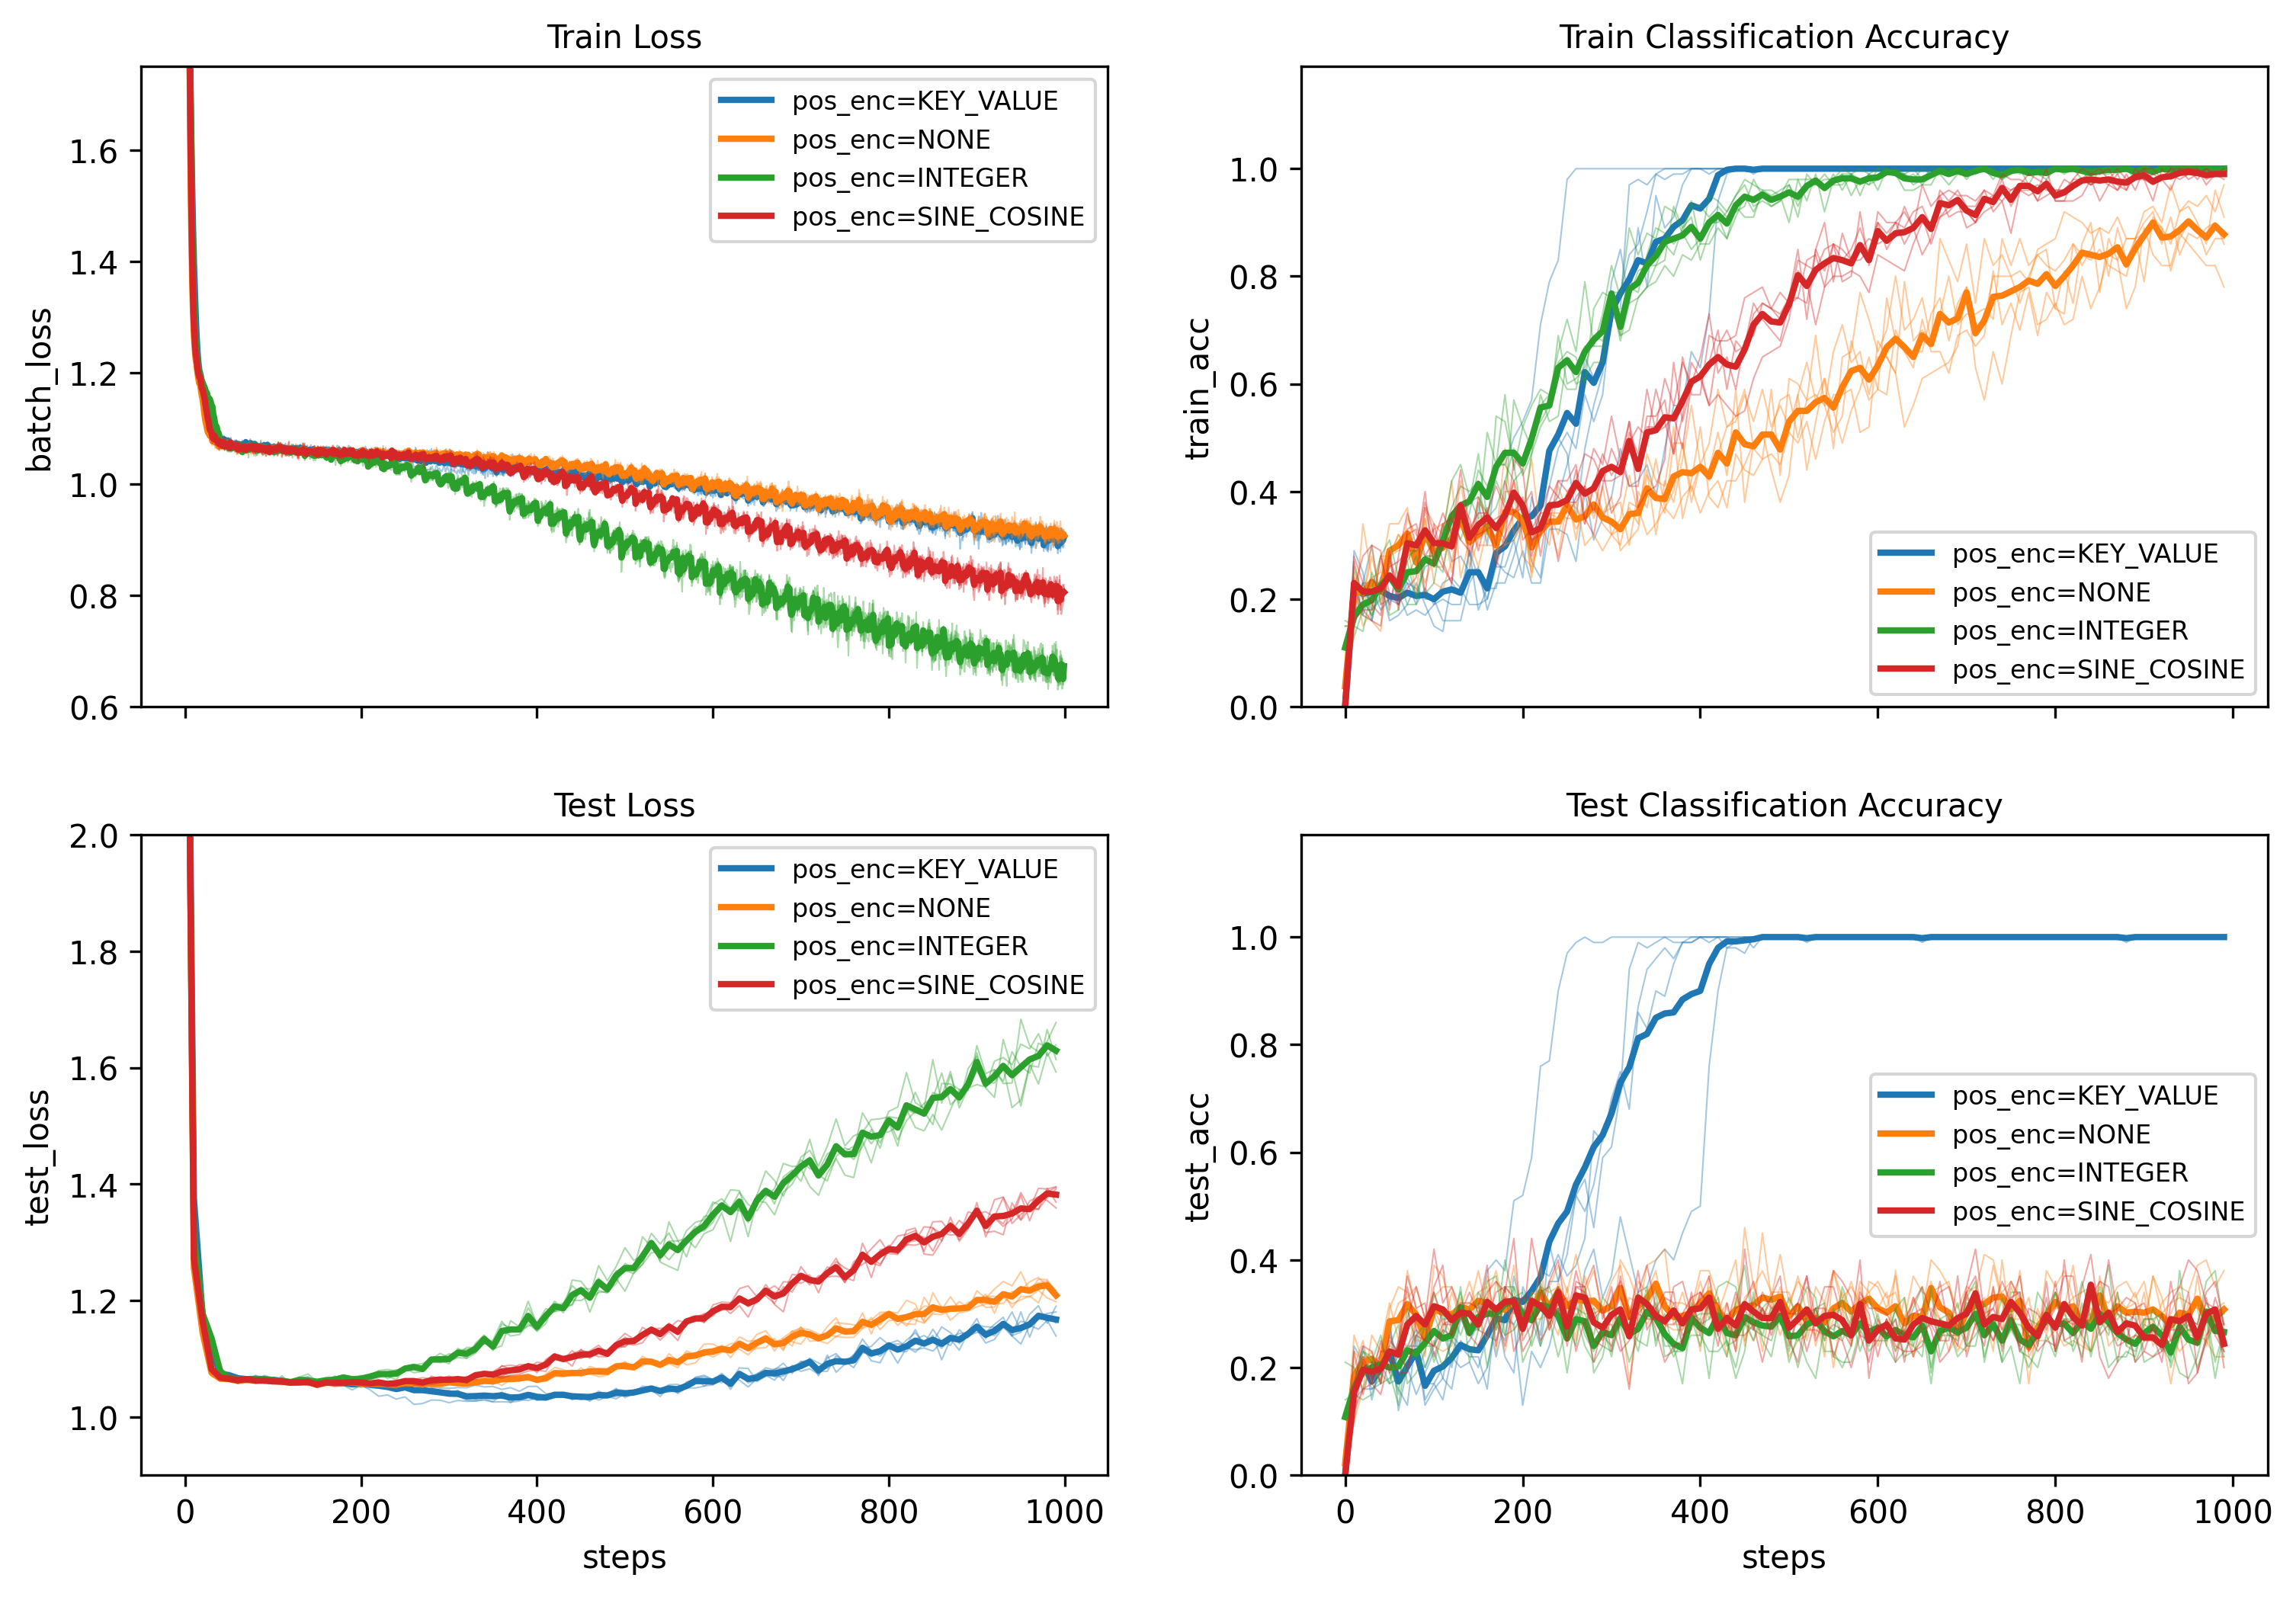

In [14]:
import guild.ipy as guild
import matplotlib.pyplot as plt
import numpy as np

from origami.utils.guild import plot_scalar_history

run_ids = {
    "KEY_VALUE": "df7d8872",
    "NONE": "15b6172c",
    "INTEGER": "c81546ca",
    "SINE_COSINE": "84531c0d",
}


runs = guild.runs(labels=[f"train-for-run-{run_ids['KEY_VALUE']}"])
display(runs)

# matplotlib 10 color discrete colormap
colors = plt.cm.tab10(np.linspace(0, 1, 10))

fig, ax = plt.subplots(2, 2, figsize=(12, 8), dpi=300, sharex="col")


# batch_loss
for i, (pe, sha) in enumerate(run_ids.items()):
    runs = guild.runs(labels=[f"train-for-run-{sha}"])

    plot_scalar_history(
        runs,
        fig=fig,
        ax=ax[0, 0],
        scalar="batch_loss",
        color=colors[i],
        label_flags=["model.position_encoding"],
        plot_means=True,
    )

# train_acc
for i, (pe, sha) in enumerate(run_ids.items()):
    runs = guild.runs(labels=[f"train-for-run-{sha}"])

    plot_scalar_history(
        runs,
        fig=fig,
        ax=ax[0, 1],
        scalar="train_acc",
        color=colors[i],
        label_flags=["model.position_encoding"],
        plot_means=True,
    )

# test_loss
for i, (pe, sha) in enumerate(run_ids.items()):
    runs = guild.runs(labels=[f"train-for-run-{sha}"])

    plot_scalar_history(
        runs,
        fig=fig,
        ax=ax[1, 0],
        scalar="test_loss",
        color=colors[i],
        label_flags=["model.position_encoding"],
        plot_means=True,
    )

# test_acc
for i, (pe, sha) in enumerate(run_ids.items()):
    runs = guild.runs(labels=[f"train-for-run-{sha}"])

    plot_scalar_history(
        runs,
        fig=fig,
        ax=ax[1, 1],
        scalar="test_acc",
        color=colors[i],
        label_flags=["model.position_encoding"],
        plot_means=True,
    )

# legend cleanup
for i in range(2):
    for j in range(2):
        ax[i, j].legend(fontsize=8, loc="best")
        legends = ax[i, j].get_legend()
        for text in legends.get_texts():
            text.set_text(text.get_text().replace("model.position_encoding", "pos_enc"))


# titles
ax[0, 0].set_title("Train Loss", fontsize=10)
ax[0, 1].set_title("Train Classification Accuracy", fontsize=10)
ax[1, 0].set_title("Test Loss", fontsize=10)
ax[1, 1].set_title("Test Classification Accuracy", fontsize=10)

# remove x-axis label of top row
ax[0, 0].set_xlabel("")
ax[0, 1].set_xlabel("")

# set axis limits
ax[0, 0].set_ylim(0.6, 1.75)
ax[0, 1].set_ylim(0.0, 1.19)
ax[1, 0].set_ylim(0.9, 2.0)
ax[1, 1].set_ylim(0.0, 1.19)

# set figure title
# fig.suptitle("Comparing Position Encoding Methods")

## Evaluating with/without Guardrails


In [13]:
import guild.ipy as guild
import matplotlib.pyplot as plt
import numpy as np

from origami.utils.guild import plot_scalar_history

runs_gr = guild.runs(labels=["ablation-6-dungeons-easy"], filter_expr="model.guardrails=STRUCTURE_AND_VALUES")
runs_no_gr = guild.runs(labels=["ablation-6-dungeons-easy"], filter_expr="model.guardrails=NONE")

display(runs_gr)
display(runs_no_gr)

scalars_gr = runs_gr.scalars_detail()
scalars_no_gr = runs_no_gr.scalars_detail()

# filter rows where tag == test_acc

scalars_gr = scalars_gr[scalars_gr["tag"] == "test_acc"]
scalars_no_gr = scalars_no_gr[scalars_no_gr["tag"] == "test_acc"]


def find_first_match(df, column, value):
    matches = df[df[column] == value]
    return matches.iloc[0]["step"] if not matches.empty else None


# add run hash as column
scalars_gr["run"] = [run.id[:8] for run in scalars_gr["run"]]
scalars_no_gr["run"] = [run.id[:8] for run in scalars_no_gr["run"]]

display(scalars_gr)
display(scalars_no_gr)

# get distinct run IDs

run_ids_gr = scalars_gr["run"].unique()
run_ids_no_gr = scalars_no_gr["run"].unique()

print(run_ids_gr)
print(run_ids_no_gr)

n_successes_gr = []
n_successes_no_gr = []

for rid in run_ids_gr:
    # filter rows where run column is rid
    run_gr = scalars_gr[scalars_gr["run"] == rid]

    # find first match where val is 1.0
    n_successes_gr.append(find_first_match(run_gr, "val", 1.0))

for rid in run_ids_no_gr:
    # filter rows where run column is rid
    run_no_gr = scalars_no_gr[scalars_no_gr["run"] == rid]

    # find first match where val is 1.0
    n_successes_no_gr.append(find_first_match(run_no_gr, "val", 1.0))

print(n_successes_gr)
print(n_successes_no_gr)

# calculate means and stds of n_successes

n_successes_gr_mean = np.mean(n_successes_gr)
n_successes_no_gr_mean = np.mean(n_successes_no_gr)

n_successes_gr_std = np.std(n_successes_gr)
n_successes_no_gr_std = np.std(n_successes_no_gr)

print(f"guardrails mean: {n_successes_gr_mean}, std: {n_successes_gr_std}")
print(f"no guardrails mean: {n_successes_no_gr_mean}, std: {n_successes_no_gr_std}")


,run,operation,started,status,label
0,af59f58a,origami:all,2024-12-04 15:31:31,completed,ablation-6-dungeons-easy
1,0d11c856,origami:all,2024-12-04 15:31:25,completed,ablation-6-dungeons-easy
2,dcaea33f,origami:all,2024-12-04 15:31:20,completed,ablation-6-dungeons-easy
3,4aea0e2d,origami:all,2024-12-04 15:31:13,completed,ablation-6-dungeons-easy
4,1b7f5a95,origami:all,2024-12-04 14:55:12,completed,ablation-6-dungeons-easy
5,26dff5e2,origami:all,2024-12-04 13:49:49,completed,ablation-6-dungeons-easy
6,05380f5f,origami:all,2024-12-04 13:49:28,completed,ablation-6-dungeons-easy
7,1ace62e8,origami:all,2024-12-04 11:55:54,completed,ablation-6-dungeons-easy
8,9793f4e2,origami:all,2024-12-04 11:55:48,completed,ablation-6-dungeons-easy
9,dc32c8bf,origami:all,2024-12-04 11:55:38,completed,ablation-6-dungeons-easy


,run,operation,started,status,label
0,2a2ab97d,origami:all,2024-12-04 13:12:54,completed,ablation-6-dungeons-easy
1,26b0634e,origami:all,2024-12-04 13:12:23,completed,ablation-6-dungeons-easy
2,f6b60e2f,origami:all,2024-12-04 13:12:19,completed,ablation-6-dungeons-easy
3,7fe4b959,origami:all,2024-12-04 12:36:59,completed,ablation-6-dungeons-easy
4,19ed9d29,origami:all,2024-12-04 12:36:51,completed,ablation-6-dungeons-easy
5,efdfe708,origami:all,2024-12-04 11:55:24,completed,ablation-6-dungeons-easy
6,ae66e38e,origami:all,2024-12-04 11:15:10,completed,ablation-6-dungeons-easy
7,52752deb,origami:all,2024-12-04 11:15:10,completed,ablation-6-dungeons-easy
8,d775e0f6,origami:all,2024-12-04 11:15:10,completed,ablation-6-dungeons-easy
9,746d2016,origami:all,2024-12-04 11:15:10,completed,ablation-6-dungeons-easy


/Users/thomas/code/origami/.venv/lib/python3.11/site-packages/guild/ipy.py:207: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [row[1][0].value for row in self.iterrows()]
/Users/thomas/code/origami/.venv/lib/python3.11/site-packages/guild/ipy.py:207: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return [row[1][0].value for row in self.iterrows()]


,run,path,tag,val,step
5,af59f58a,.guild,test_acc,0.17,0
58,af59f58a,.guild,test_acc,0.16,10
111,af59f58a,.guild,test_acc,0.16,20
164,af59f58a,.guild,test_acc,0.12,30
217,af59f58a,.guild,test_acc,0.19,40
...,...,...,...,...,...
52820,dc32c8bf,.guild,test_acc,1.00,960
52873,dc32c8bf,.guild,test_acc,1.00,970
52926,dc32c8bf,.guild,test_acc,1.00,980
52979,dc32c8bf,.guild,test_acc,1.00,990


,run,path,tag,val,step
5,2a2ab97d,.guild,test_acc,0.00,0
58,2a2ab97d,.guild,test_acc,0.15,10
111,2a2ab97d,.guild,test_acc,0.19,20
164,2a2ab97d,.guild,test_acc,0.23,30
217,2a2ab97d,.guild,test_acc,0.22,40
...,...,...,...,...,...
52820,746d2016,.guild,test_acc,1.00,960
52873,746d2016,.guild,test_acc,1.00,970
52926,746d2016,.guild,test_acc,1.00,980
52979,746d2016,.guild,test_acc,1.00,990


['af59f58a' '0d11c856' 'dcaea33f' '4aea0e2d' '1b7f5a95' '26dff5e2'
 '05380f5f' '1ace62e8' '9793f4e2' 'dc32c8bf']
['2a2ab97d' '26b0634e' 'f6b60e2f' '7fe4b959' '19ed9d29' 'efdfe708'
 'ae66e38e' '52752deb' 'd775e0f6' '746d2016']
[310, 340, 280, 300, 320, 300, 290, 260, 310, 320]
[540, 300, 380, 500, 660, 740, 480, 430, 480, 440]
guardrails mean: 303.0, std: 21.470910553583888
no guardrails mean: 495.0, std: 121.75795661885921


/Users/thomas/code/origami/.venv/lib/python3.11/site-packages/guild/ipy.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return _runs_scalars_detail([self[0].value])
/Users/thomas/code/origami/.venv/lib/python3.11/site-packages/guild/ipy.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return _runs_scalars_detail([self[0].value])
/Users/thomas/code/origami/.venv/lib/python3.11/site-packages/guild/ipy.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by 

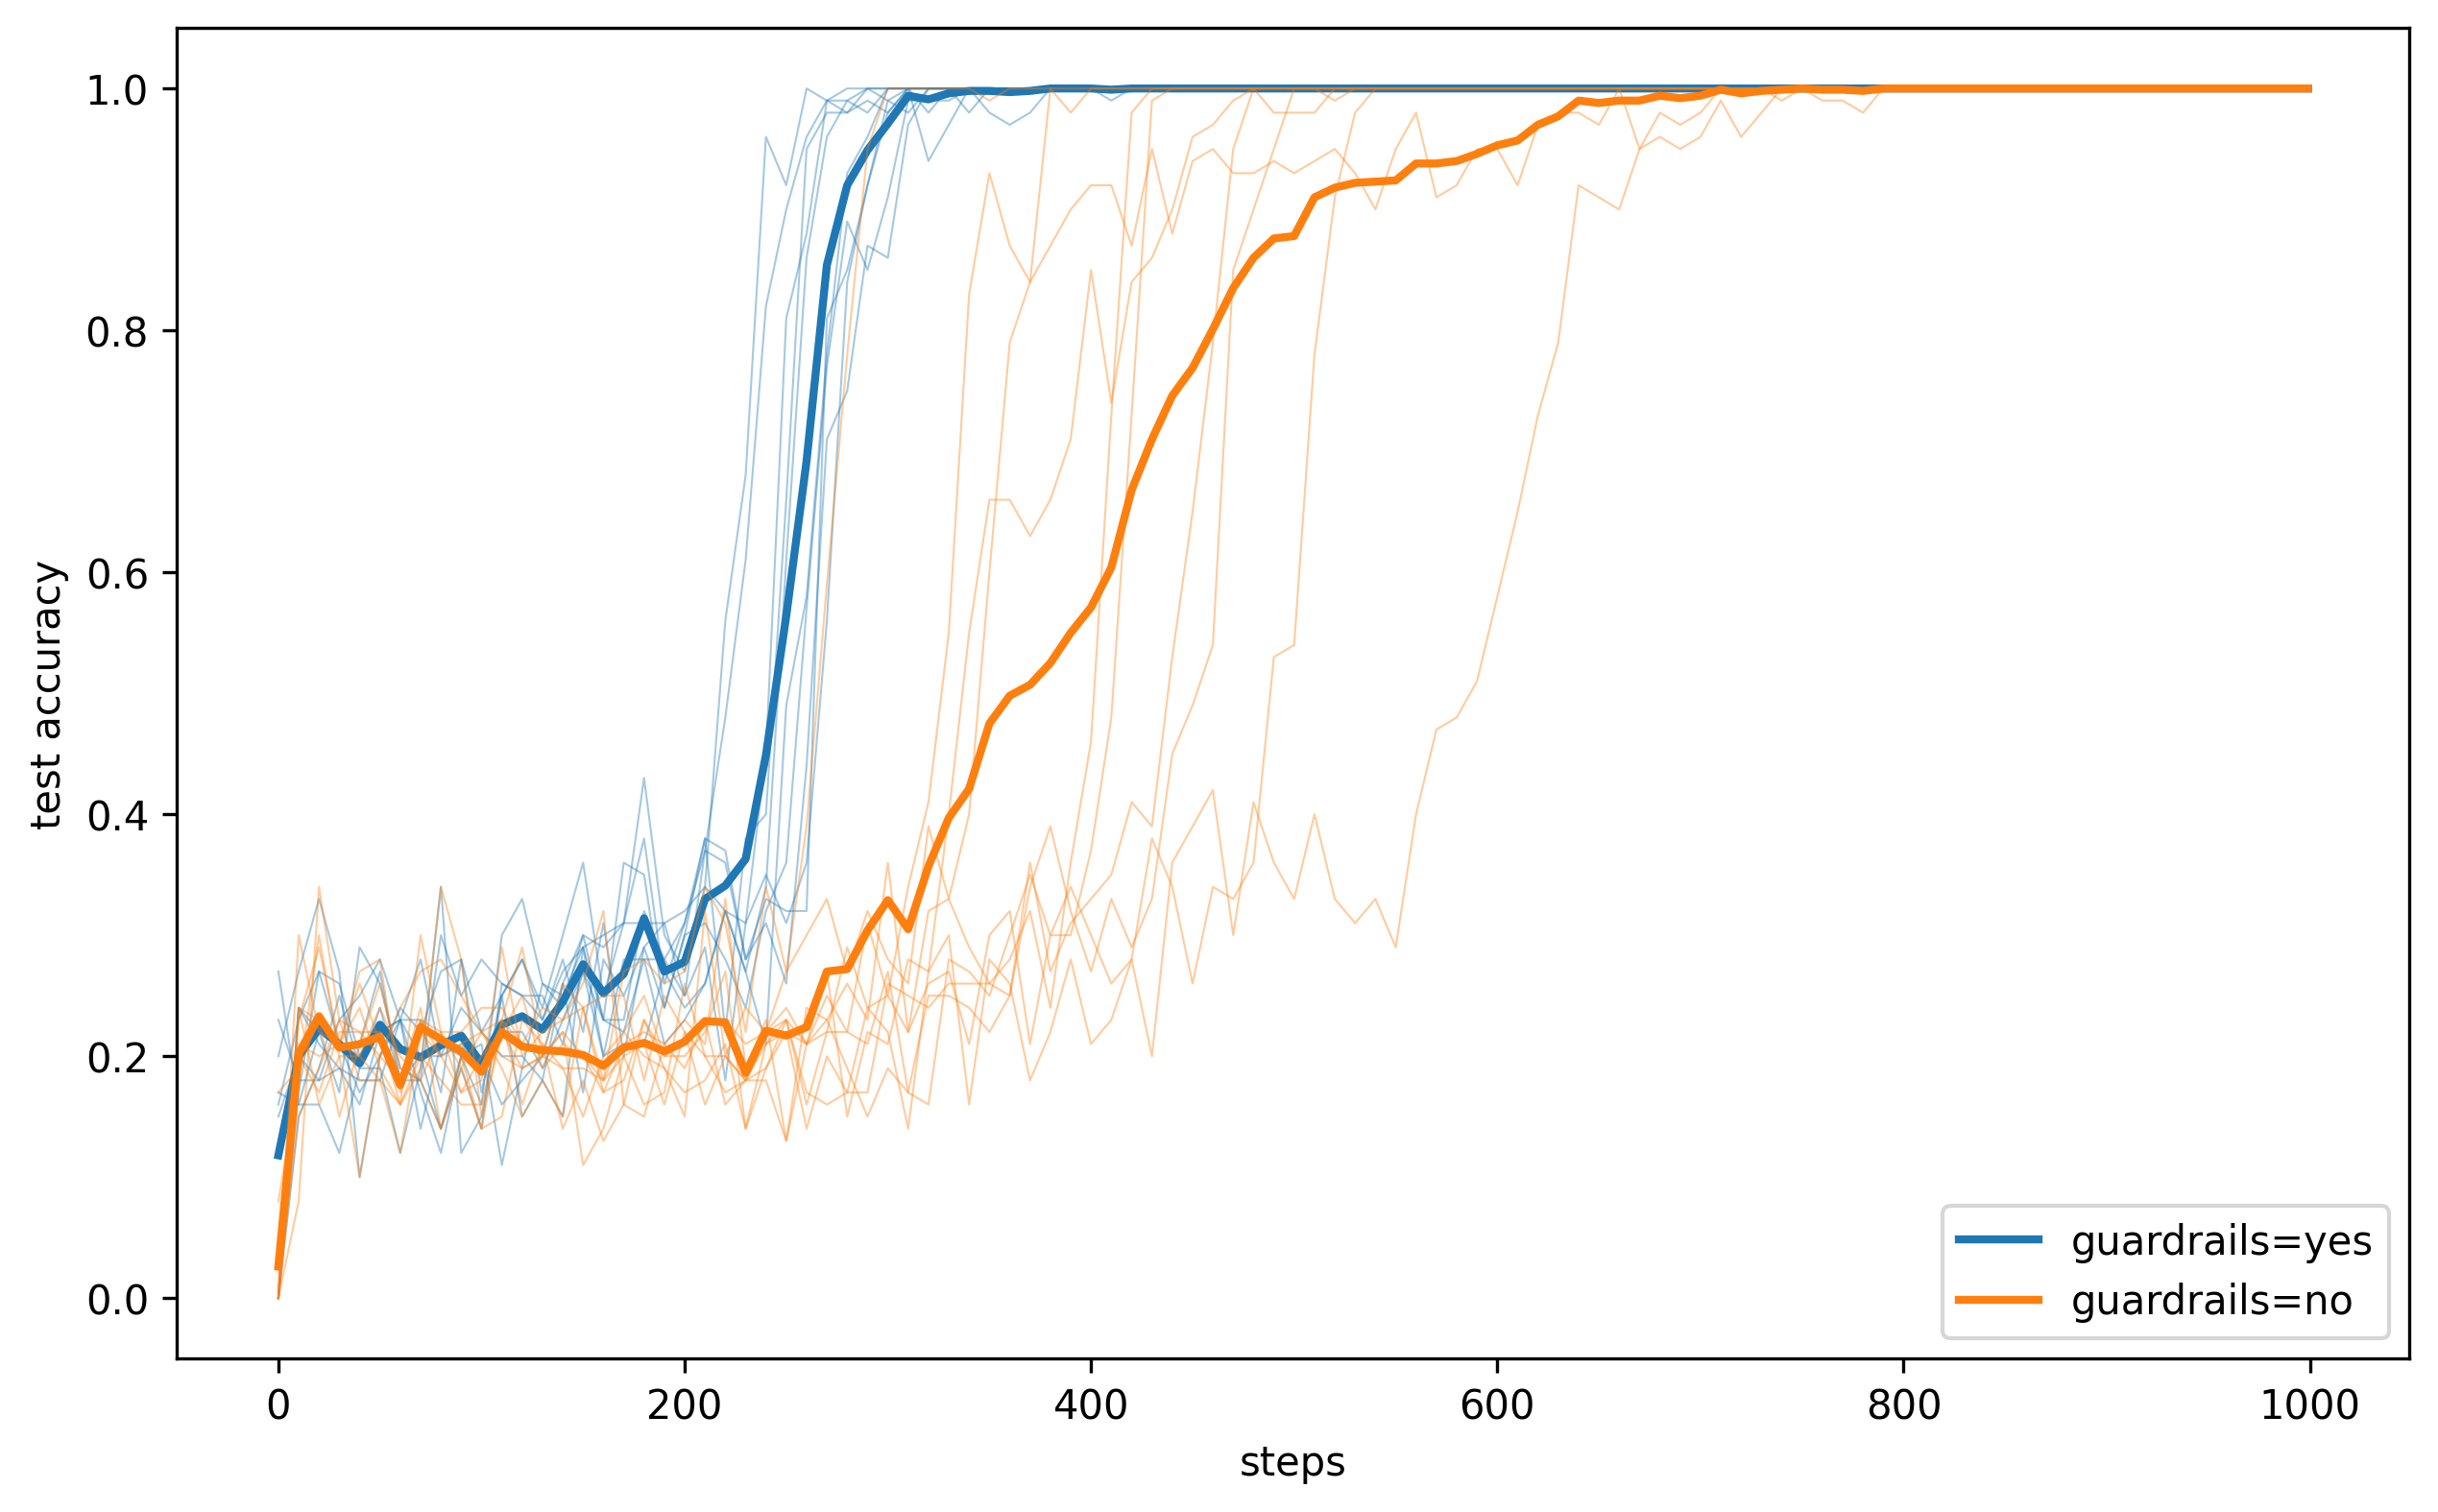

In [35]:
import matplotlib.pyplot as plt

# Create figure with white background
plt.figure(figsize=(10, 6), dpi=300, facecolor="white")
ax = plt.gca()
ax.set_facecolor("white")

# matplotlib standard color palette first 2 colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]


plot_scalar_history(
    runs_gr,
    fig=fig,
    ax=ax,
    color=colors[0],
    scalar="test_acc",
    label_flags=["model.guardrails"],
    plot_means=True,
)

plot_scalar_history(
    runs_no_gr,
    fig=fig,
    ax=ax,
    color=colors[1],
    scalar="test_acc",
    label_flags=["model.guardrails"],
    plot_means=True,
)

# clear title
ax.set_title("")

# set y-axis label to test accuracy
ax.set_ylabel("test accuracy")

# move legend to bottom right corner
ax.legend(
    loc="lower right",
    fontsize=10,
)

# replace legend text
for text in ax.get_legend().get_texts():
    text.set_text(text.get_text().replace("model.guardrails", "guardrails"))
    text.set_text(text.get_text().replace("NONE", "no"))
    text.set_text(text.get_text().replace("STRUCTURE_AND_VALUES", "yes"))
